<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
هایپرپارامترها
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هدف از این تمرین،‌ آشنایی عمیق‌تر با هایپرپارامترهای مختلف یک شبکه‌ی عصبی و تاثیر آن‌ها در عملکرد شبکه است. برای این کار به حل یک مسئله‌ی دسته‌بندی چندکلاسه تصویر خواهیم پرداخت، البته بدون استفاده از لایه‌های کانولوشنی، و سعی خواهیم کرد با تنظیم بهتر هایپرپارامترها به مدلی با عملکرد بهتر دست یابیم.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
با این‌که داده‌های این مسئله از جنس تصویر است اما به دلیل ساده بودن آن نیازی به استفاده از لایه‌های کانولوشنی نخواهیم داشت و در این تمرین باید از لایه‌های کاملاْ متصل (Fully Connected) استفاده کنید.
<br>
<span style="color:orange"><b>نکته:</b></span>
پیشنهاد می‌شود به دلیل احتمال طولانی‌شدن فرآیند آموزش مدل در سیستم شخصی شما، این نت‌بوک را روی گوگل کولب اجرا کنید.
</font>
</p>


In [24]:
from scipy import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
‌خواندن داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ی این مسئله «هدی» نام دارد که برگرفته از <a href="https://www.sciencedirect.com/science/article/abs/pii/S0167865507000037">این پژوهش</a> است و شامل تصویر ارقام دست‌نویس فارسی‌ست. هر تصویر با یک برچسب از ۰ تا ۹ مشخص شده است. این مجموعه‌داده را می‌توانید از فایل <code>hoda.mat</code> بخوانید. نیاز است ۴۰۰۰۰ تصویر نخست را به‌عنوان مجموعه‌ی آموزشی، ۱۰۰۰۰ تصویر بعد را به‌عنوان مجموعه‌ی اعتبارسنجی و ۱۰۰۰۰ تصویر آخر را به‌عنوان مجموعه‌ی آزمون در نظر بگیرید.
<br>
<span style="color:green"><b>راهنمایی ۱:</b></span>
برای خوانش این فایل می‌توانید از تابع <code>io.loadmat</code> از کتابخانه‌ی <code>scipy</code> استفاده کنید.
<br>
<span style="color:green"><b>راهنمایی ۲:</b></span>
نمونه‌ها در آرایه‌ای با نام <code>Data</code> و برچسب‌ها در آرایه‌ای با نام <code>labels</code> قرار گرفته‌اند.
برای دسترسی راحت‌تر به نمونه‌های مجموعه‌داده و جداسازی آن تابع <code>np.squeeze</code> به کمک شما می‌آید.
<br>
<span style="color:green"><b>راهنمایی ۳:</b></span>
اگر نت‌بوک را روی گوگل کولب اجرا می‌کنید برای دریافت آسان فایل مجموعه‌داده می‌توانید از کد زیر بهره ببرید تا فایل مربوطه به‌صورت مستقیم از گوگل درایو دانلود شود.
<center>
<code>!gdown 1LJcwIeUsswfpAnlPtYiFkGpIhQdeFHwq</code>
</center>

</font>
</p>

In [25]:
data = io.loadmat('hoda.mat')

In [26]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [27]:
data_array = np.squeeze(data['Data'])
labels_array = np.squeeze(data['labels'])

In [28]:
train_data = data_array[:40000]
valid_data = data_array[40000:50000]
test_data = data_array[50000:]
train_labels = labels_array[:40000]
valid_labels = labels_array[40000:50000]
test_labels = labels_array[50000:]

In [29]:
X_train = train_data
y_train = train_labels
X_valid = valid_data
y_valid = valid_labels
X_test = test_data
y_test = test_labels

In [30]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(40000,) (40000,)
(10000,) (10000,)
(10000,) (10000,)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از خوانش و جداسازی نمونه‌ها، ۹ نمونه‌ی اول مجموعه‌ی آموزشی را در یک شکل ۳ در ۳ به همراه برچسب‌های آن‌ها نمایش دهید.
</font>
</p>

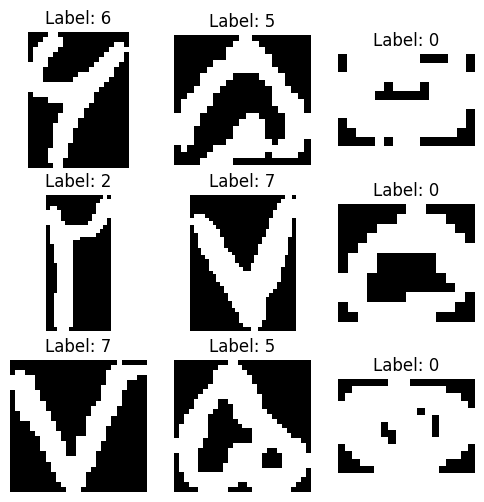

In [32]:
import matplotlib.pyplot as plt

def display_samples(X, y, num_samples=9):
    plt.figure(figsize=(6, 6))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        sample = X[i]
        plt.imshow(sample, cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

display_samples(X_train, y_train, num_samples=9)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آماده‌سازی داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که احتمالاً از تصویرهای نمایش داده‌شده در بخش قبل متوجه شده‌اید تصاویر موجود در این مجموعه‌داده با اندازه‌های گوناگونی هستند. از آن‌جا که نیاز است ورودی‌های شبکه‌ی ما همگی با یک اندازه‌ی مشخص باشند نیاز است تصاویر را به یک اندازه‌ی مشابه نگاشت کنید. یک ایده این است که اندازه‌ی تصاویر خود را ۶۲ در ۶۲ در نظر بگیرید و هر تصویری که کوچک‌تر از این اندازه است را با اضافه کردن سطرها یا ستون‌های مشکی به اطراف آن به این اندازه برسانید، به‌نحوی که رقم دست‌نویس در وسط تصویر باقی بماند. بنابراین پیشنهاد می‌کنیم در این قسمت چنین روشی را پیاده‌سازی کنید. با این حال، اگر احساس می‌کنید قادر به پیاده‌سازی رویکرد بهتری هستید نیز آزاد هستید از آن استفاده کنید و توضیحاتی ارائه دهید. توجه داشته باشید باید این کار را برای تمام تصاویر موجود در تمام مجموعه‌ها (آموزشی، اعتبارسنجی و آزمون) انجام دهید.
</font>
</p>

In [33]:
import cv2

def resize_images(images, new_size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)
        resized_images.append(resized_image)
    return np.array(resized_images)

new_size = (62, 62)
X_train_resized = resize_images(X_train, new_size)
X_valid_resized = resize_images(X_valid, new_size)
X_test_resized = resize_images(X_test, new_size)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از این تغییر اندازه، مجدد ۹ نمونه‌ی اول مجموعه‌ی آموزشی را در یک شکل ۳ در ۳ به همراه برچسب‌های آن‌ها نمایش دهید.
</font>
</p>

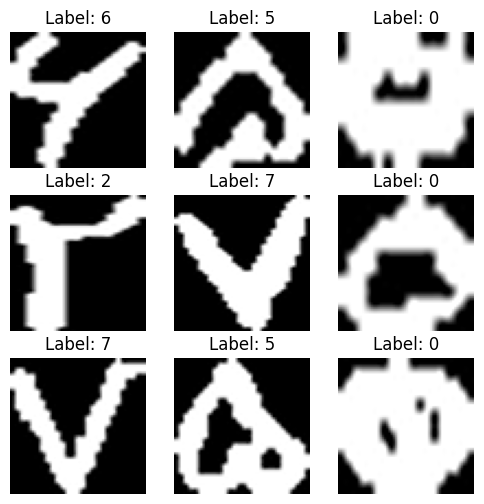

In [34]:
import matplotlib.pyplot as plt

def display_resized_samples(X, y, num_samples=9):
    plt.figure(figsize=(6, 6))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        sample = X[i]
        plt.imshow(sample, cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

display_resized_samples(X_train_resized, y_train, num_samples=9)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از آن‌جا که شبکه‌ی عصبی مورد استفاده در این تمرین یک شبکه‌ی عمیق کاملاً متصل خواهد بود، ورودی شبکه باید به‌شکل یک بردار باشد، و نه ماتریس. بنابراین در این قسمت نیاز است هر تصویر را مسطح کرده و به شکل یک بردار نشان دهید. یعنی هر تصویر ۶۲ در ۶۲ شما باید به شکل یک بردار ۳۸۴۴ بازنمایی شود.
</font>
</p>

In [35]:
X_train_vectorized = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_valid_vectorized = X_valid_resized.reshape(X_valid_resized.shape[0], -1)
X_test_vectorized = X_test_resized.reshape(X_test_resized.shape[0], -1)

print(X_train_vectorized.shape)
print(X_valid_vectorized.shape)
print(X_test_vectorized.shape)

(40000, 3844)
(10000, 3844)
(10000, 3844)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
علاوه بر این، به دلیل آسان‌تر شدن فرآیند آموزش مدل پیشنهاد می‌شود مقادیر هر تصویر که شامل اعداد ۰ تا ۲۵۵ هستند را به بازه‌ی ۰ تا ۱ نرمال کنید. برای این‌کار می‌توانید به‌سادگی مقادیر را تقسیم بر ۲۵۵ کنید.
</font>
</p>

In [36]:
X_train_normalized = X_train_vectorized / 255.0
X_valid_normalized = X_valid_vectorized / 255.0
X_test_normalized = X_test_vectorized / 255.0

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همچنین با توجه به این‌که مسئله‌ی ما چندکلاسه است نیاز است خروجی شبکه به‌صورت بردار تک‌نمود (One-Hot) باشد.
بنابراین در این قسمت نیاز است برچسب‌ها را به کمک تابع <code>to_categorical</code> از کتابخانه‌ی <code>keras.utils</code> به این شکل تبدیل کنید.
</font>
</p>

In [37]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_valid_onehot = to_categorical(y_valid, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

print(y_train_onehot.shape)
print(y_valid_onehot.shape)
print(y_test_onehot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت مدل 
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت می‌خواهیم مرحله به مرحله چند ساختار شبکه‌ی مختلف را مورد آزمایش قرار دهیم و عملکرد هرکدام از آن‌ها را روی یک نمودار واحد نمایش دهیم تا قادر به مقایسه و تحلیل آن‌ها باشیم.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
تاریخچه‌ی عملکرد هر مدل روی مجموعه‌ی اعتبارسنجی (دقت مدل در هر دور) را به‌صورت جداگانه نگه دارید زیرا که نیاز است در آخر یک نمودار مشترک از آن‌ها رسم کنید.
</font>
</p>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل اول
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا شبکه‌ای بسازید که در لایه‌ی ورودی شامل ۶۴ نورون باشد و از تابع فعال‌سازی <code>tanh</code> استفاده کنید. سپس یک لایه‌ی کاملاً متصل با ۱۰ نورون به‌عنوان لایه‌ی خروجی قرار داده و از تابع فعال‌سازی <code>softmax</code> استفاده کنید. در نهایت از تابع <code>categorical_crossentropy</code> به‌عنوان تابع هزینه استفاده کنید و تابع بهینه‌ساز را معادل <code>SGD</code> با نرخ یادگیری <code>0.01</code> قرار دهید.
<br>
علاوه بر این، برای آموزش مدل از تکنیک <code>EarlyStopping</code> استفاده کنید تا نیاز به آموزش بی‌رویه‌ی مدل نباشد. می‌توانید مانیتور آن را روی <code>`val_loss`</code> و <code>patience</code> آن را روی <code>10</code> تنظیم کنید.
<br>
در انتها مدل خود را برای ۱۰۰ دور و با اندازه‌ی دسته معادل ۳۲ آموزش دهید.
</font>
</p>

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping

model1 = Sequential()

model1.add(Dense(64, activation='tanh', input_shape=(3844,)))
model1.add(Dense(10, activation='softmax'))

In [39]:
model1.compile(optimizer=SGD(learning_rate=0.01), loss=categorical_crossentropy, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [40]:
history1 = model1.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2440 - accuracy: 0.9418 - val_loss: 0.1500 - val_accuracy: 0.9606
Epoch 2/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1246 - accuracy: 0.9685 - val_loss: 0.1184 - val_accuracy: 0.9669
Epoch 3/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1010 - accuracy: 0.9740 - val_loss: 0.1035 - val_accuracy: 0.9731
Epoch 4/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0876 - accuracy: 0.9776 - val_loss: 0.0940 - val_accuracy: 0.9746
Epoch 5/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0783 - accuracy: 0.9800 - val_loss: 0.0873 - val_accuracy: 0.9767
Epoch 6/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0713 - accuracy: 0.9821 - val_loss: 0.0816 - val_accuracy: 0.9774
Epoch 7/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0655 - accuracy: 0.9833 - val_loss: 0.0780 - val_ac

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
عملکرد مدل نهایی را روی مجموعه‌ی اعتبارسنجی گزارش کنید. علاوه بر این نمودار دقت مدل را برای مجموعه‌ی آموزشی و آزمون در یک نمودار واحد نشان دهید.
</font>
</p>

In [41]:
final_val_accuracy = history1.history['val_accuracy'][-1]

In [42]:
final_val_accuracy

0.9865999817848206

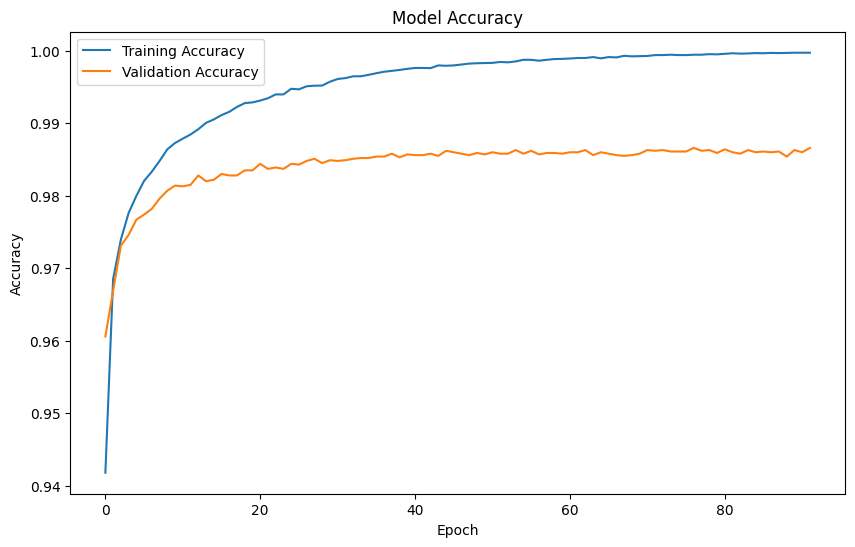

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل دوم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون مدل دیگری طراحی کنید که مشابه با مدل قبل بوده و تنها تابع فعال‌ساز آن در لایه‌ی نخست <code>ReLU</code> باشد. مراحل قبل را در این مدل نیز تکرار کنید.
</font>
</p>

In [44]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(3844,)))
model2.add(Dense(10, activation='softmax'))

In [45]:
model2.compile(optimizer=SGD(learning_rate=0.01), loss=categorical_crossentropy, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [46]:
history2 = model2.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping])


Epoch 1/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2189 - accuracy: 0.9412 - val_loss: 0.1375 - val_accuracy: 0.9624
Epoch 2/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1136 - accuracy: 0.9694 - val_loss: 0.1108 - val_accuracy: 0.9684
Epoch 3/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0933 - accuracy: 0.9747 - val_loss: 0.0980 - val_accuracy: 0.9728
Epoch 4/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0799 - accuracy: 0.9787 - val_loss: 0.0890 - val_accuracy: 0.9739
Epoch 5/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0712 - accuracy: 0.9814 - val_loss: 0.0805 - val_accuracy: 0.9787
Epoch 6/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0636 - accuracy: 0.9832 - val_loss: 0.0755 - val_accuracy: 0.9782
Epoch 7/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0575 - accuracy: 0.9852 - val_loss: 0.0741 - val_ac

In [47]:
final_val_accuracy2 = history2.history['val_accuracy'][-1]

In [48]:
final_val_accuracy2

0.9865000247955322

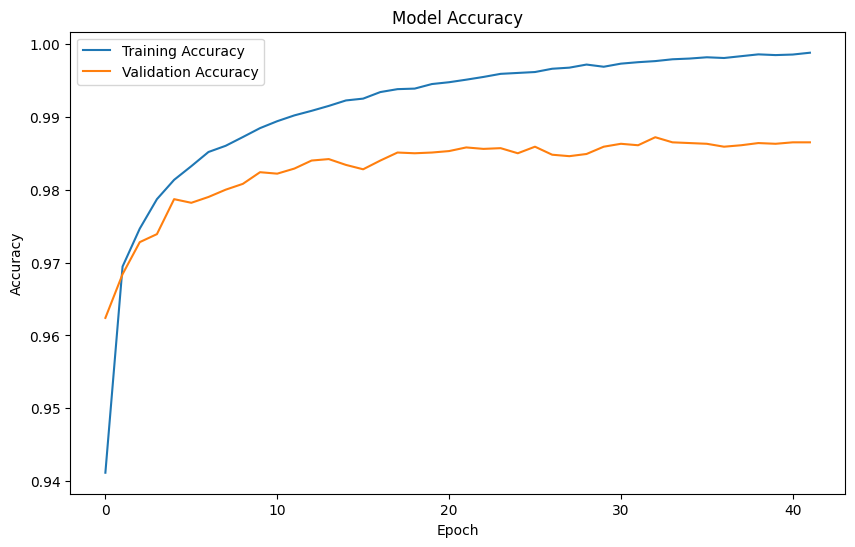

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل سوم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون یک مدل مشابه مدل قبل طراحی کرده اما بین لایه‌ی ورودی و خروجی یک لایه‌ی کاملاً متصل دیگر شامل ۲۵۶ نورون قرار دهید و از تابع فعال‌سازی <code>relu</code> استفاده کنید. مراحل قبل را تکرار کنید.
</font>
</p>

In [50]:
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(3844,)))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(10, activation='softmax'))


In [51]:
model3.compile(optimizer=SGD(learning_rate=0.01), loss=categorical_crossentropy, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [52]:
history3 = model3.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping])


Epoch 1/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2699 - accuracy: 0.9280 - val_loss: 0.1302 - val_accuracy: 0.9616
Epoch 2/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1117 - accuracy: 0.9687 - val_loss: 0.1050 - val_accuracy: 0.9698
Epoch 3/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0892 - accuracy: 0.9746 - val_loss: 0.0900 - val_accuracy: 0.9734
Epoch 4/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0745 - accuracy: 0.9793 - val_loss: 0.0808 - val_accuracy: 0.9781
Epoch 5/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0645 - accuracy: 0.9821 - val_loss: 0.0886 - val_accuracy: 0.9745
Epoch 6/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0577 - accuracy: 0.9841 - val_loss: 0.0669 - val_accuracy: 0.9818
Epoch 7/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0514 - accuracy: 0.9860 - val_loss: 0.0655 - val_ac

In [53]:
final_val_accuracy3 = history3.history['val_accuracy'][-1]


In [54]:
final_val_accuracy3

0.988099992275238

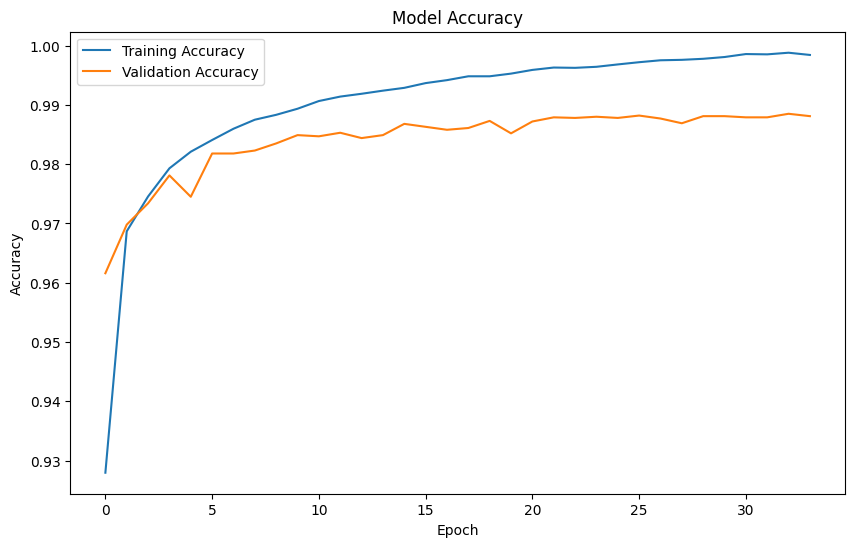

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل چهارم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون توابع فعال‌ساز <code>ReLU</code> مدل قبل را به <code>LeakyReLU</code> با آلفای <code>0.1</code> تغییر دهید و مراحل قبل را تکرار کنید.
</font>
</p>

In [56]:
from keras.layers import LeakyReLU


model4 = Sequential()
model4.add(Dense(64, activation=LeakyReLU(alpha=0.1), input_shape=(3844,)))
model4.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model4.add(Dense(10, activation='softmax'))


In [57]:
model4.compile(optimizer=SGD(learning_rate=0.01), loss=categorical_crossentropy, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [58]:
history4 = model4.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping])


Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2506 - accuracy: 0.9334 - val_loss: 0.1338 - val_accuracy: 0.9609
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1083 - accuracy: 0.9695 - val_loss: 0.1225 - val_accuracy: 0.9622
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0871 - accuracy: 0.9762 - val_loss: 0.0891 - val_accuracy: 0.9753
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0735 - accuracy: 0.9799 - val_loss: 0.0827 - val_accuracy: 0.9766
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0645 - accuracy: 0.9820 - val_loss: 0.0724 - val_accuracy: 0.9796
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0568 - accuracy: 0.9841 - val_loss: 0.0695 - val_accuracy: 0.9805
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0510 - accuracy: 0.9862 - val_loss: 0.0686 - val_ac

In [59]:
final_val_accuracy4 = history4.history['val_accuracy'][-1]


In [60]:
final_val_accuracy4

0.988099992275238

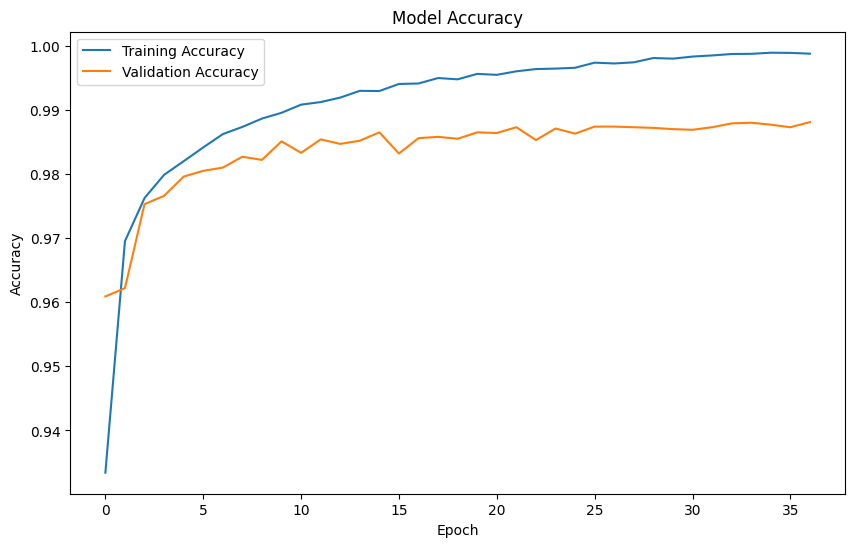

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقایسه و تحلیل مدل‌ها
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون از شما می‌خواهیم یک نمودار واحد رسم کنید که دقت هرکدام از مدل‌های بالا روی مجموعه‌ی اعتبارسنجی در هر دور با یک خط و رنگ مجزا نشان داده شده باشد.
<br>
پس از رسم این نمودار، لطفاً طبق نتایج به‌دست‌آمده تحلیل خود را از تاثیر هرکدام از هایپرپارامترها یا تغییراتی که در مدل داده‌اید بنویسید. سعی کنید در تحلیل خود دلیلی برای وجود این تفاوت‌ها ارائه دهید.
</font>
</p>

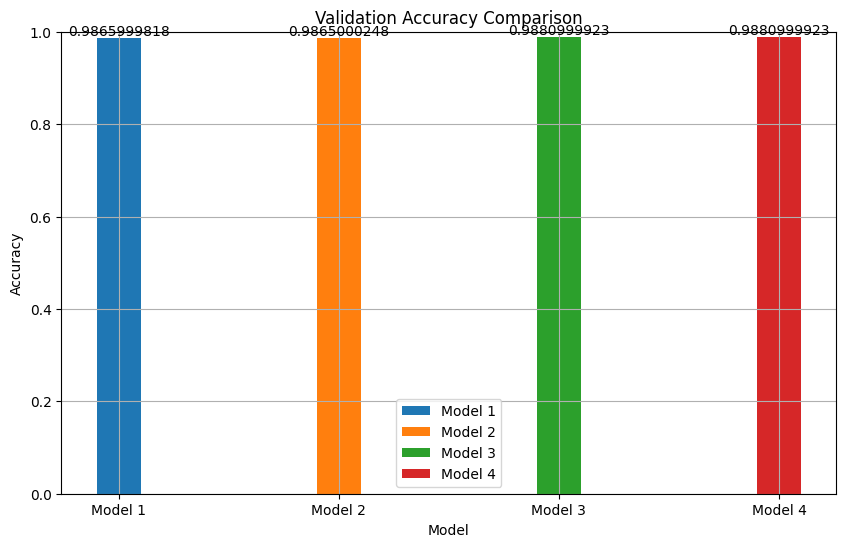

In [79]:
import numpy as np
import matplotlib.pyplot as plt

val_accuracies = [
    final_val_accuracy,
    final_val_accuracy2,
    final_val_accuracy3,
    final_val_accuracy4,
]

model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
num_models = len(val_accuracies)
bar_width = 0.2
x_positions = np.arange(num_models)
plt.figure(figsize=(10, 6))

for i in range(num_models):
    plt.bar(
        x_positions[i],
        val_accuracies[i],
        width=bar_width,
        label=model_names[i],
        align='center',
    )
    plt.text(
        x_positions[i],
        val_accuracies[i],
        f'{val_accuracies[i]:.10f}', 
        ha='center', 
        va='bottom', 
    )

plt.xticks(x_positions, model_names)
plt.ylim(0, 1.0)
plt.grid(True)
plt.legend()
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')

plt.show()


In [81]:
val_accuracies = [
    final_val_accuracy,
    final_val_accuracy2,
    final_val_accuracy3,
    final_val_accuracy4,
]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

for i in range(4):
    print(f'{model_names[i]} Accuracy: {val_accuracies[i]:.10f}')

Model 1 Accuracy: 0.9865999818
Model 2 Accuracy: 0.9865000248
Model 3 Accuracy: 0.9880999923
Model 4 Accuracy: 0.9880999923


<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model 1
</font>
</h3>

Achieved an accuracy of approximately 98.66%. 

This model used the hyperbolic tangent (tanh) activation function in the first layer and the softmax activation function in the output layer. It used the categorical cross-entropy loss and stochastic gradient descent (SGD) as the optimizer with a learning rate of 0.01. 

The use of tanh in the initial layer could have made it slightly less effective at recognising complex patterns in the data compared to rectified linear unit (ReLU) activations.

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model 2
</font>
</h3>

Model 2 achieved a similar accuracy of approximately 98.65%. 

The key difference in this model is that it used ReLU activation in the first layer instead of tanh. 

This change in activation function might not have significantly impacted the model's performance, as the accuracy is very close to that of Model 1.

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model 3
</font>
</h3>

Model 3 achieved a higher accuracy of approximately 98.81%. 

This model is identical to Model 2, except for the addition of a densely connected layer with 256 neurons and ReLU activation between the input and output layers. 

This allowed it to capture more intricate patterns in the data, resulting in improved accuracy.

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model 4
</font>
</h3>


Model 4 also achieved an accuracy of approximately 98.81%, as well as Model 3. 

The difference in this model is the use of Leaky ReLU activation in the layers, with an alpha value of 0.1. 

The Leaky ReLU activation allows small negative values to pass through, which can be helpful for preventing vanishing gradients. 

This activation function might have contributed to the model's performance improvement.

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
جست‌وجوی بیشتر
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به صلاح‌دید خود سعی کنید هایپرپارامترهای بیشتری را تنظیم کنید تا به مدلی با عملکرد بهتر روی مجموعه‌ی اعتبارسنجی دست یابید. می‌توانید از تکنیک <code>Dropout</code> بهره ببرید، وزن‌ها را رگولارایز کنید، از روش دیگری برای مقداردهی اولیه‌ی وزن‌ها استفاده کنید، تعداد نورون‌ها یا لایه‌ها را کاهش یا افزایش دهید، تابع بهینه‌ساز را تغییر دهید یا نرخ یادگیری متفاوتی را امتحان کنید. همچنین می‌توانید از تنظیم‌کننده‌ی هایپرپارامتر کتابخانه‌ی کراس نیز بهره ببرید. در انتها نیاز است ساختار مدل شما،‌ عملکرد نهایی آن روی مجموعه‌ی آموزشی و نمودار دقت آن در مجموعه‌ی آموزشی و اعتبارسنجی قابل مشاهده باشد.
</font>
</p>

In [88]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner import Objective

Using TensorFlow backend


C:\Users\Acer\AppData\Local\Temp\ipykernel_30436\3453602022.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [90]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(64, activation='relu', input_shape=(3844,)))

    model.add(keras.layers.Dense(units=hp.Int('units', min_value=64, max_value=256, step=64), activation='relu'))

    for _ in range(hp.Int('num_layers', min_value=0, max_value=3)):
        model.add(keras.layers.Dense(units=hp.Int('units', min_value=64, max_value=256, step=64), activation='relu'))
        model.add(keras.layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5)))

    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [91]:
tuner = RandomSearch(
    build_model,
    objective=Objective("val_accuracy", direction="max"),
    max_trials=10,
    directory='my_dir',
    project_name='Hyper_Parameter'
)

tuner.search(X_train_normalized, y_train_onehot, epochs=100, validation_data=(X_valid_normalized, y_valid_onehot))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
final_model = tuner.hypermodel.build(best_hps)
histort_final = final_model.fit(X_train_normalized, y_train_onehot, epochs=100, validation_data=(X_valid_normalized, y_valid_onehot))

Trial 10 Complete [00h 05m 16s]
val_accuracy: 0.9879000186920166

Best val_accuracy So Far: 0.9900000095367432
Total elapsed time: 00h 50m 00s
Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3407 - accuracy: 0.8993 - val_loss: 0.1275 - val_accuracy: 0.9609
Epoch 2/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1322 - accuracy: 0.9611 - val_loss: 0.1053 - val_accuracy: 0.9689
Epoch 3/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1024 - accuracy: 0.9710 - val_loss: 0.0813 - val_accuracy: 0.9753
Epoch 4/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0879 - accuracy: 0.9753 - val_loss: 0.0741 - val_accuracy: 0.9766
Epoch 5/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0732 - accuracy: 0.9786 - val_loss: 0.0663 - val_accuracy: 0.9799
Epoch 6/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0647 - accuracy: 0.9816 - val_loss: 0.0615 - val_accu

In [93]:
final_val_accuracy_final = histort_final.history['val_accuracy'][-1]

In [94]:
val_accuracies = [
    final_val_accuracy,
    final_val_accuracy2,
    final_val_accuracy3,
    final_val_accuracy4,
]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

for i in range(4):
    print(f'{model_names[i]} Accuracy: {val_accuracies[i]:.10f}')

print("And the final model Accuracy : ", final_val_accuracy_final)

Model 1 Accuracy: 0.9865999818
Model 2 Accuracy: 0.9865000248
Model 3 Accuracy: 0.9880999923
Model 4 Accuracy: 0.9880999923
And the final model Accuracy :  0.9883000254631042


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نتیجه‌ی نهایی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال که به مدلی با عملکرد بهتر روی مجموعه‌ی اعتبارسنجی دست پیدا کرده‌اید نیاز است این مدل نهایی‌شده را طبق نمونه‌های موجود در مجموعه‌ی آزمون ارزیابی کنید. با استفاده از تابع <code>classification_report</code> از کتابخانه‌ی <code>sklearn.metrics</code> گزارش دقت، صحت، بازخوانی و سایر معیارهای مربوط به مدل خود را روی مجموعه‌ی آزمون گزارش دهید.
</font>
</p>

In [95]:
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_onehot, axis=1)
report = classification_report(y_true_labels, y_pred_labels)

313/313 [==============================] - 0s 897us/step


In [96]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       975
           1       0.98      1.00      0.99       999
           2       0.99      0.99      0.99       992
           3       0.99      0.98      0.99      1005
           4       0.98      0.98      0.98       991
           5       0.99      0.99      0.99      1020
           6       0.99      0.98      0.99       992
           7       0.99      1.00      0.99      1006
           8       1.00      1.00      1.00      1024
           9       0.99      0.99      0.99       996

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

